In [11]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

import scipy.stats
import pandas as pd
from itertools import groupby
import csv
from sklearn import linear_model
from fomlads.data.external import import_for_classification
from fomlads.model.classification import project_data
from fomlads.model.classification import fisher_linear_discriminant_projection

from fomlads.plot.exploratory import plot_scatter_array_classes
from fomlads.plot.exploratory import plot_class_histograms

#from tutorial scikit

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.linear_model import SGDClassifier

from sklearn import metrics

In [12]:
#importing training data
data_source_training = 'Data/training.csv'
input_cols = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
inputs, targets, field_names, classes = import_for_classification(data_source_training,input_cols = input_cols)

inputs.shape

dataframe.columns = Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
input_cols = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
classes = array(['acoustic', 'classical', 'edm', 'hip-hop', 'house', 'jazz',
       'k-pop', 'pop', 'r-n-b', 'rock'], dtype=object)


(6993, 15)

In [13]:
print(f"Inputs have {np.mean(inputs):.3f} mean and deviation {np.std(inputs):.3f}")
print(f"Inputs have {np.mean(targets):.3f} mean and deviation {np.std(targets):.3f}")

Inputs have 14189.812 mean and deviation 59311.399
Inputs have 4.499 mean and deviation 2.872


In [14]:
#importing testing data

data_source_test = 'Data/testing.csv'
input_cols = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
inputs_t, targets_t, field_names_t, classes = import_for_classification(data_source_test,input_cols = input_cols)

inputs_t.shape


dataframe.columns = Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
input_cols = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
classes = array(['acoustic', 'classical', 'edm', 'hip-hop', 'house', 'jazz',
       'k-pop', 'pop', 'r-n-b', 'rock'], dtype=object)


(3007, 15)

In [15]:
#building clf

clf = SGDClassifier()
clf.fit(inputs,targets)

SGDClassifier()

### Testing

In [18]:
#testing predictions for a given line in test data

test_this = 1

choices = [0 for i in range(10)]

for k in range(10):
    pred = 0
    for i in range(15):
        pred += inputs_t[test_this][i]*clf.coef_[k][i]
    pred += clf.intercept_[k]
    choices[k] = pred
    print(f"for {classes[k]} result is: {pred}")
k = 0
i = 0
print(max(choices))

for acoustic result is: -818487642.3179336
for classical result is: -266855153.72236535
for edm result is: -565379948.3818717
for hip-hop result is: -849251475.6104348
for house result is: -137747955.95827773
for jazz result is: 262609173.12357545
for k-pop result is: -686070875.9587214
for pop result is: -419160610.8587071
for r-n-b result is: -789697672.8892192
for rock result is: -463419771.99003303
262609173.12357545


In [19]:
#testing projection

y_train_pred = clf.predict(inputs_t)
print (metrics.accuracy_score(targets_t, y_train_pred))

0.1000997672098437


In [9]:
targets[120]

0.0

In [10]:
classes

array(['acoustic', 'classical', 'edm', 'hip-hop', 'house', 'jazz',
       'k-pop', 'pop', 'r-n-b', 'rock'], dtype=object)

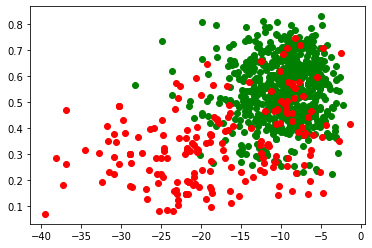

In [11]:
colors = ['green','red','blue']

for i in range(900):
    px = inputs[i][6]
    py = inputs[i][3]
    plt.scatter(px,py,c = colors[int(targets[i])])
    

#plt.xscale('log')
plt.show()